**Faire une copie du Notebook pour qu'il soit identifié comme le vôtre:**  ``Make a copy`` (``Faire une copie``) dans le menu déroulant ``File``(``Fichier``) . <br>
**Renommer la copie TPx_yyy_nom1_nom2.ipynb  ( où x=1 ou 2 ou 3 ou 4 numéro du TP et yyy:OPS -> Notebook d'analyse, yyy-> Camera_Image):** ``Rename`` (`` Renommer``) dans le menu déroulant ``File``(``Fichier``).

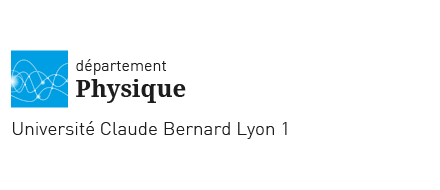

# Licence Physique, Université  Lyon 1 
# U.E.  PHY2005L  :  "Optique physique et spectroscopie "

## Consignes pour les étudiants

- **Exécution**

**Exécuter toujours  le notebook depuis le début** (en appuyant sur le bouton **`Exécuter`** ou **`Run`**) cellule après cellule. En effet un notebook est un programme et pas une simple page HTML qui doit s'exécuter dans l'ordre du début à la fin.

**Suivre les instructions pour remplir les cellules** de ``code`` (calcul python) avec vos données expérimentales  ou de texte ``markdown`` puis ``Exécuter`` la cellule. 
 
- **En cas de problème**

Tout d'abord, ``redémarrer le noyau`` (dans la barre de menus, sélectionnez **`Noyau -> Redémarrer`** ou  **`Kernel -> Restart`**),
puis exécuter toutes les cellules (dans la barre de menus, sélectionnez **`Cellule -> Executer tout`** ou **`Cell -> Run All`**).

-**`Exécuter`** la cellule suivante:

In [3]:
from IPython.display import Markdown,display

- **Dans la cellule suivante :**
<br> $\rightarrow$ ***Remplacer*** *par vos noms, prénoms et numéros d'étudiant  du binôme les données renseignées dans la cellule suivante:*
 <br> puis **`Exécuter`** les 2 cellules suivantes.

In [4]:
NOM1    = "Caulier"
PRENOM1 = "Adam"
NUMERO_ETUDIANT1 = 12304842
NOM2    = "Charmate"
PRENOM2 = "Rayane"
NUMERO_ETUDIANT2 = 12304569

In [5]:
if type(NUMERO_ETUDIANT1) is not int:
    print("ERREUR: numéro d'étudiant non spécifié!!!")
else:
    display(Markdown("**Etudiant:** {} {}  **ID:** {}"
                     .format(NOM1,PRENOM1,NUMERO_ETUDIANT1)))

if type(NUMERO_ETUDIANT2) is not int:
    print("ERREUR: numéro d'étudiant non spécifié!!!")
else:
    display(Markdown("**Etudiant:** {} {}  **ID:** {}"
                     .format(NOM2,PRENOM2,NUMERO_ETUDIANT2)))

**Etudiant:** Caulier Adam  **ID:** 12304842

**Etudiant:** Charmate Rayane  **ID:** 12304569

La cellule ci-dessous contient l'ensemble du code python qui permet d'importer les bibliothèques ou modules nécessaires à l'éxécution de ce Notebook-Jupyter  →  Cliquer sur la cellule et ``Executer``

In [6]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [7]:
#NOM1="NOM1";NOM2="NOM2"
#NOM3="NOM_etudiant3";noms=NOM1+'-'+NOM2+'-'+NOM3; # ligneà décommenter si vous êtes un trinôme
noms=NOM1+'-'+NOM2 # ligne à commenter si vous êtes un trinôme
noms

'Caulier-Charmate'

# TP2: Spectroscopie d'une lampe inconnue 
L'objectif de cette manipulation est de réaliser la spectroscopie de la vapeur de l'atome contenue dans l'ampoule d'une lampe. Le spectromètre  est constitué par un réseau utilisé en incidence normale sur la plateforme d'un goniomètre. Ce dispositif permet de mesurer les longueurs d'onde des raies émises. La qualité des mesures sera discutée en regard des caractéristiques de deux réseaux mis à disposition.


## 1. Détermination des incertitudes de mesure sur les deux réseaux:
Dans une première étape les réseaux seront caractérisés (détermination de $n$ le nombre de traits par unité de longueur) dans un montage simple  en étudiant la diffraction en incidence normale d'un faisceau laser HeNe, monochromatique, de $\lambda=632.8nm$.

         Figure 1 : schéma du montage
   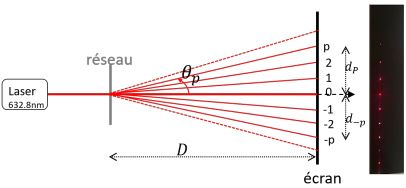
La contrainte essentielle est de s'assurer que le réseau est bien placé en incidence normale, perpendiculairement au faisceau laser, afin que la relation fondamentale des réseaux puisse être appliquée : $\sin \theta_p=n p \lambda $. Cette contrainte est testée en vérifiant que les triangles que forment les distances $D, d_P$ et $D,d_{-p}$ sont rectangles. De plus la fonction sinus est impaire par conséquent pour un $p$ donné $|d_p|=|d_{-p}|$.

   - Montrer que $n(traits/mm)=\frac{\sin(\arctan(\frac{dp}{D}))}{(p *\lambda_{HeNe}*1000)}=\frac{\frac{dp}{D}}{(p *\lambda_{HeNe}*1000)\sqrt{1+(\frac{dp}{D})^2}}$ où $\lambda_{HeNe}$ est exprimée en m et $\theta_p=\arctan(\frac{dp}{D})$ en radian.
   -Montrer que $\frac{\Delta n}{n}=\frac{1}{1+(\frac{dp}{D})^2} (\frac{\Delta_D}{|D|}+\frac{\Delta_{dp}}{|dp|})$ <br>
Rappel :  $\cos(\arctan(x))=\frac{1}{\sqrt{(1+x^2)}}$ et $\sin(\arctan(x))=\frac{x}{\sqrt{(1+x^2)}}$

**Insérer  dans la cellule markdown** suivante les démonstrations demandées: ( soit en utilisant latex, soit en scannant une démonstration faite sur papier: $\rightarrow$ double cliquer sur la cellule puis cliquer sur ``` Edition```
 en bas du menu déroulant clique sur ```insérer une image```)

<font color="violet">**Démonstrations:**</font>
- $n(traits/mm)=$
- $\frac{\Delta n}{n}=$

In [8]:
#longueur d'onde de la source en m (en informatique e-9 correspond à 10 puissance -9)
HeNe=632.8e-9 #en m
#définition des fonctions pour évaluer n et Δn numériquement
def nbr(dp,p,D):return np.sin(np.arctan(dp/D))/(p*HeNe*1e3) #en nbre traits/mm
def delta_nbr(dp,p,D,Delta_D,Delta_dp):
    return nbr(dp,p,D)*1/(1+(dp/D)**2)*(Delta_D/np.abs(D)+Delta_dp/np.abs(dp))

 **Faire vérifier votre montage par l'encadrant de TP** puis faire les mesures:    
$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [9]:
#mesures pour les réseaux "80trait/mm"  et "600 traits/mm":elles sont stockées dans des tableaux
#numpy np.array([])
#-->remplacer les valeurs numériques en vert par vos propres mesures

#pour chaque mesures préciser quel réseau est caractérisé--> tableau nom (remplacer)
nom=np.array(['réseau A','réseau A','réseau B','réseau B'])

#pour chaque mesure préciser la distance D mesurée--> tableau DR et ΔR (incertitude de mesure)
DR=np.array([1000,1000,1000,1000]) #en mm
incertitude_mesure_DR=5# en mm

#pour chaque mesure préciser la distance dp entre la tache non diffractée et la tache de diffraction 
#numéro p--> tableau des ordres pR, tableau des mesures dpR et incertitude de mesure.
pR=np.array([3,-3,1,-1])
dpR=np.array([150,-145,404,-423]) #en mm
incertitude_mesure_dpR=5 #en mm

In [10]:
tableau=np.ones(len(DR))
Delta_DR=tableau*incertitude_mesure_DR #en mm
Delta_dp=tableau*incertitude_mesure_dpR #en mm

#applications numériquesgrâce aux fonctions python 
n_reseau=nbr(dpR,pR,DR)
Delta_n=delta_nbr(dpR,pR,DR,Delta_DR,Delta_dp)

#mise en forme d'un tableau récapitulatif les données brute sont publiées avant les applications numériques.
pd.set_option("display.max_colwidth",12)
Reseau={noms+' ordre p':pR,'d$_p$(mm)':dpR,'Δd$_p$(mm)':Delta_dp,'D(mm)':DR
        ,'ΔD(mm)':Delta_DR
        ,'n(traits/mm)':np.round(nbr(dpR,pR,DR),0)
        ,'Δn':np.round(Delta_n,0)
       }
Reseau_data=pd.DataFrame(index=nom,data=Reseau)
Reseau_data

,Caulier-Charmate ordre p,d$_p$(mm),Δd$_p$(mm),D(mm),ΔD(mm),n(traits/mm),Δn
réseau A,3,150,5.0,1000,5.0,78.0,3.0
réseau A,-3,-145,5.0,1000,5.0,76.0,3.0
réseau B,1,404,5.0,1000,5.0,592.0,9.0
réseau B,-1,-423,5.0,1000,5.0,616.0,9.0


**Conclure** sur la qualité de vos mesures, comparer avec la donnée constructeur.

<font color="violet">**Réponses:**</font>

 **Faire valider vos mesures par l'encadrant de TP**     
$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [11]:
#choisir la valeur du nombre de traits/mm pour chacun des réseaux étudiés

# On attribue ici à nA la 1ere valeur calculée  dans le tableau n_reseau:n_reseau[0]
#et à nB la 3eme :n_reseau[2]
#(vous pouvez choisir d'autres valeurs plus précises!)

nA=(np.round(n_reseau[0],0))
nB=(np.round(n_reseau[2],0))
ΔnA=np.round(Delta_n[0],0)
ΔnB=np.round(Delta_n[2],0)
print("nA=(",nA,"\u00B1",ΔnA,")traits/mm)")
print("nB=(",nB,"\u00B1",ΔnB,")traits/mm )")

nA=( 78.0 ± 3.0 )traits/mm)
nB=( 592.0 ± 9.0 )traits/mm )


## 2. Spectroscopie de la lampe
Le spectromètre à réseau est illustré par le montage suivant :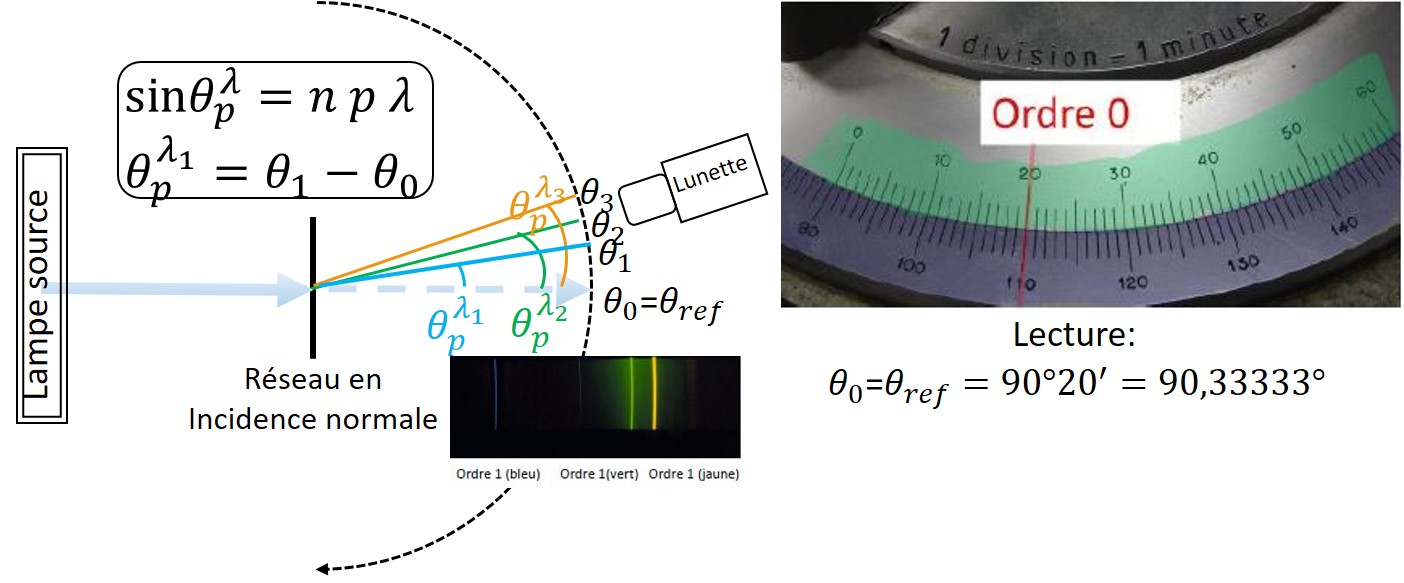
Par la méthode d'autocollimation nous déposons les réseaux au centre de la plateforme en incidence normale. Dans ce montage l'origine des mesures d'angle est notée $\theta_{ref}$ et l'incertitude des mesures des angles ($\theta_{\text{ref}}$ et $\theta_i$) est de 1' soit une incertitude de 2' pour $\theta_p^\lambda$.

L'observation aux différents ordres du réseau (p>0 et p<0) montre toujours la même série de raies intenses: violet,indigo,vert,jaunes (doublet de raies si p>1 avec le réseau 1). 
- Par comparaison avec le tableau des raies d'émission données dans le fascicule pour différents éléments donner le nom de l'élément qui est à l'origine des radiations lumineuses.
- A partir de la relation fondamentale des réseaux $\sin \theta_p^{\lambda}=n p \lambda$ donner l'expression de $\lambda$.
- par différenciation de cette relation, montrer que de $\Delta \lambda=\lambda \left( |\frac{\Delta \theta}{\tan(\theta)}|+\frac{\Delta n}{n}  \right)$.

<font color="violet">**Réponses:**</font>
- nature de l'atome :
- démonstration $\lambda= $
- démonstration $\Delta \lambda=$

<font color="blue" font>Les fonctions ```longOnde(thetareel,n,p)``` ,  ```delta(thetareel,n,p,delta_n)``` et ```theta_attendue(λ,n,p)``` permettent le calcul de $\lambda_{exp}$, $\Delta \lambda_{exp}$ et $\theta_{attendue}$. Elles sont définies dans la cellule de code suivante.

In [12]:
#  définition des fonctions pour les applications numériques 
#attention les angles doivent être convertis en radian (*π/180)
def longOnde(thetareel,n,p): return 1e9*(np.sin(thetareel*np.pi/180))/(n*1e3*p) #en nm
def theta_attendue(λ,n,p): return 180/np.pi*np.arcsin(n*1e3*p*λ*1e-9)

def delta(thetareel,n,p,delta_n):
    return longOnde(thetareel,n,p)*(np.abs((delta_theta*np.pi/180)/np.tan(thetareel*np.pi/180))+delta_n/n)

$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [13]:
#goniomètre : renseigner l'angle lu en incidence normale en degré!
theta_ref=270+40/60 #en degré
delta_theta=4/60# en degré

- **Rappel** : une mesure $a$ d'incertitude $\Delta a$ peut-être comparée à sa valeur attendue $a_{attendue}$. <br>
Si la relation $a -\Delta a \leq a_{attendue}\leq a +\Delta a$ la mesure est cohérente avec la valeur attendue.

<font color="blue" font>La fonction ```test(a,b,c)``` permet de vérifier la qualité de l'angle mesuré.</font>


In [14]:
def test(a,b,c):
    rep='out'
    if (a-b)<c<(a+b):
        rep='in'
    else :rep='out'
    return rep

### a. réseau 1: "80" traits/mm
- positionner le réseau sur la plateforme du goniomètre en incidence normale
- pour s'assurer que le réseau est en incidence normale, on utilise la parité de la fonction sinus en s'assurant par exemple que  les positions angulaires de  la raie verte à l'odre $p=1$ et $p=-1$ vérifient: <br>
$|\theta_{p}|=|\theta_{-p}|$ (attention $\theta_{p}=\theta_{\text{lue}}-\theta_{\text{ref}}$) avec l'odre $p=\pm1$ la première fois que l'on observe le système de raies de couleur à gauche ou à droite de la raie centrale.
- on rappelle que pour les angles :
    - $90°27'=(90+\frac{27}{60})°$ 
    - dans les applications numériques les angles doivent être exprimés en radian $90°27'=\left[(90+\frac{27}{60})\times \frac{\pi}{180}\right]$rad


 **Faire vérifier votre montage par l'encadrant de TP** puis faire les mesures:    
$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [15]:
#lampe: choix des raies de couleurs spectroscopiques mesurées
couleurHg=np.array(['violet','indigo','vert','jaune1','jaune2'])
lambdaHg=np.array([404.83,435.83,546.07,576.96,579.07])

**Mesurer les positions angulaires des raies de couleurs observées à différents ordres:** <br>
 - Il y a autant de tableaux que d'ordres mesurés. Deux cellules de code sont nécessaires pour chaque ordre $p$ choisi. 
 - Dans cet exemple nous proposons  l'étude pour $p=1$, $p=-1$ et $p=3$. 
 - Changer les valeurs  des angles dans les tableaux ```thetalu_R1_xx```en indiquant celles obervées sur votre goniomètre. **Les angles sont exprimés en°** la conversion en radian est réalisée dans la définition des fonctions.
<br> **Remarque**: Si la raie jaune n'est pas dédoublée, indiquer la même valeur d'angle pour le jaune1 et le jaune2!
<br> $\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [16]:
#paramètres du réseau 1 de 80 traits/mm
n1=nA
Delta_n1=ΔnA
#mesures pour l'odre p=1 du réseau n1=nA pour les 5 raies de couleur (la jaune compte double car c'est un doublet)
p_R1=1
#remplacer les valeurs en "vert" dans le tableau par vos propres valeurs mesurées 
#pour les raies choisies en respectant l'ordre 'violet','indigo','vert','jaune1','jaune2'!
# L'alignement des minutes et des angles.
thetalu_R1_p1=np.array([272+28/60,272+40/60,273+10/60,273+18/60,273+18/60])

In [17]:
#rmq: la fonction numpy : np.round(val,x) permet de n'afficher que x chiffres significatifs
print('données expérimentales :réseau=(',n1,'\u00B1',Delta_n1,')traits/mm',' ordre p=',p_R1,' θ ref(°)=',np.round(theta_ref,2))

#applications numériques --> tableaux de données
theta_R1_p1=thetalu_R1_p1-theta_ref
lambda_R1_p1=np.round(longOnde(theta_R1_p1,n1,p_R1),0)
delta_lambda_R1_p1=np.round(delta(theta_R1_p1,n1,p_R1,Delta_n1),0)

#comparer les valeurs expérimentales avec les valeurs attendues
test2=np.array([test(lambda_R1_p1[i],delta_lambda_R1_p1[i],lambdaHg[i]) for i in range(len(thetalu_R1_p1))])

#mise en forme des données en tableau:
pd.set_option("display.max_colwidth",10)
tabl1={noms+' θlue°':np.round(thetalu_R1_p1,2),'θ °':np.round(theta_R1_p1,2),
       'λ (nm)':lambda_R1_p1,'Δλ (nm)':delta_lambda_R1_p1,
       'λHg(nm)':lambdaHg,'θHg°':np.round(theta_attendue(lambdaHg,n1,p_R1),2),
       'θattendue°':np.round(theta_attendue(lambdaHg,n1,p_R1)+theta_ref,2),
       'comparaison':test2 }
tabl1_data=pd.DataFrame(index=couleurHg,data=tabl1)
tabl1_data

données expérimentales :réseau=( 78.0 ± 3.0 )traits/mm  ordre p= 1  θ ref(°)= 270.67


,Caulier-Charmate θlue°,θ °,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,272.47,1.80,403.0,30.0,404.83,1.81,272.48,in
indigo,272.67,2.00,447.0,32.0,435.83,1.95,272.61,in
vert,273.17,2.50,559.0,36.0,546.07,2.44,273.11,in
jaune1,273.30,2.63,589.0,38.0,576.96,2.58,273.25,in
jaune2,273.30,2.63,589.0,38.0,579.07,2.59,273.26,in


**Faire vérifier vos mesures par l'encadrant de TP**     
$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [18]:
#paramètres du réseau 1 de 80 traits/mm
n1=nA
Delta_n1=ΔnA
#mesures pour l'odre p=-1 du réseau n1=nA pour les 5 raies de couleur ( la jaune compte double car c'est un doublet)
p_R1=-1
#remplacer les valeurs en "vert" dans le tableau par vos propres valeurs mesurées 
#pour les raies choisies en respectant l'ordre 'violet','indigo','vert','jaune1','jaune2'!
thetalu_R1_pm1=np.array([268+50/60,268+40/60,268+10/60,268+2/60,268+2/60])

In [19]:
#rmq: la fonction numpy : np.round(val,x) permet de n'afficher que x chiffres significatifs
print('données expérimentales :réseau=(',n1,'\u00B1',Delta_n1,')traits/mm',' ordre p=',p_R1,' θ(°) ref=',np.round(theta_ref,2))

#applications numériques --> tableaux de données
theta_R1_pm1=thetalu_R1_pm1-theta_ref
lambda_R1_pm1=np.round(longOnde(theta_R1_pm1,n1,p_R1),0)
delta_lambda_R1_pm1=np.round(delta(theta_R1_pm1,n1,p_R1,Delta_n1),0)

#comparer les valeurs expérimentales avec les valeurs attendues
test2=np.array([test(lambda_R1_pm1[i],delta_lambda_R1_pm1[i],lambdaHg[i]) for i in range(len(thetalu_R1_pm1))])

#mise en forme des données en tableau:
pd.set_option("display.max_colwidth",10)
tabl1={noms+' θlue°':np.round(thetalu_R1_pm1,2),'θ °':np.round(theta_R1_pm1,2),
       'λ (nm)':lambda_R1_pm1,'Δλ (nm)':delta_lambda_R1_pm1,
       'λHg(nm)':lambdaHg,'θHg°':np.round(theta_attendue(lambdaHg,n1,p_R1),2),
       'θattendue°':np.round(theta_attendue(lambdaHg,n1,p_R1)+theta_ref,2),
       'comparaison':test2 }
tabl1_data=pd.DataFrame(index=couleurHg,data=tabl1)
tabl1_data

données expérimentales :réseau=( 78.0 ± 3.0 )traits/mm  ordre p= -1  θ(°) ref= 270.67


,Caulier-Charmate θlue°,θ °,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,268.83,-1.83,410.0,31.0,404.83,-1.81,268.86,in
indigo,268.67,-2.00,447.0,32.0,435.83,-1.95,268.72,in
vert,268.17,-2.50,559.0,36.0,546.07,-2.44,268.23,in
jaune1,268.03,-2.63,589.0,38.0,576.96,-2.58,268.09,in
jaune2,268.03,-2.63,589.0,38.0,579.07,-2.59,268.08,in


**Faire vérifier vos mesures par l'encadrant de TP**     

Les  deux cellules suivantes reprennent les valeurs obtenues pour les ordres symétriques $p=\pm 1$ par concaténation des tableaux. Cela facilite la vérification des mesures réalisées qui doivent vérifier la parité de la fonction sinus.  
*A priori rien ne doit être modifié dans les deux cellules suivantes*.

In [20]:
#tableau résumé des valeurs obtenues pour p=1 et p=-1 ( permet de vérifier la parité de sin)

#réseau choisi
n1=nA
Delta_n1=ΔnA

aHg=np.concatenate((lambdaHg,lambdaHg))
bHg=np.concatenate((couleurHg,couleurHg))

tabl=np.ones(len(couleurHg))# détermination du nombre d'éléments par ordre

#mesures pour p=1, avec le réseau 1:thetalu_R1_p1
p1=tabl*1 

#mesures pour p=-1, avec le réseau 1:thetalu_R1_pm1
pm1=tabl*(-1)

p_R1=np.concatenate((p1,pm1))
thetalu_R1=np.concatenate((thetalu_R1_p1,thetalu_R1_pm1))

In [21]:
print('données expérimentales :réseau=(',n1,'\u00B1',Delta_n1,')traits/mm',' ordre p=',p_R1,' θ(°) ref=',np.round(theta_ref,2))

#applications numériques --> tableaux de données
theta_R1=thetalu_R1-theta_ref
lambda_R1=np.round(longOnde(theta_R1,n1,p_R1),0)
delta_lambda_R1=np.round(delta(theta_R1,n1,p_R1,Delta_n1),0)

#comparer les valeurs expérimentales avec les valeurs attendues
test2=np.array([test(lambda_R1[i],delta_lambda_R1[i],aHg[i]) for i in range(len(thetalu_R1))])

#mise en forme des données en tableau:
pd.set_option("display.max_colwidth",10)
tabl1={noms+' p':p_R1,'θlue°':np.round(thetalu_R1,2),'θ° ':np.round(theta_R1,2),
       'λ (nm)':lambda_R1,'Δλ (nm)':delta_lambda_R1,
       'λHg(nm)':aHg,'θHg°':np.round(theta_attendue(aHg,n1,p_R1),2),
       'θattendue°':np.round(theta_attendue(aHg,n1,p_R1)+theta_ref,2),
       'comparaison':test2 }
tabl1_data=pd.DataFrame(index=bHg,data=tabl1)
tabl1_data

données expérimentales :réseau=( 78.0 ± 3.0 )traits/mm  ordre p= [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]  θ(°) ref= 270.67


,Caulier-Charmate p,θlue°,θ°,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,1.0,272.47,1.80,403.0,30.0,404.83,1.81,272.48,in
indigo,1.0,272.67,2.00,447.0,32.0,435.83,1.95,272.61,in
vert,1.0,273.17,2.50,559.0,36.0,546.07,2.44,273.11,in
jaune1,1.0,273.30,2.63,589.0,38.0,576.96,2.58,273.25,in
jaune2,1.0,273.30,2.63,589.0,38.0,579.07,2.59,273.26,in
violet,-1.0,268.83,-1.83,410.0,31.0,404.83,-1.81,268.86,in
indigo,-1.0,268.67,-2.00,447.0,32.0,435.83,-1.95,268.72,in
vert,-1.0,268.17,-2.50,559.0,36.0,546.07,-2.44,268.23,in
jaune1,-1.0,268.03,-2.63,589.0,38.0,576.96,-2.58,268.09,in
jaune2,-1.0,268.03,-2.63,589.0,38.0,579.07,-2.59,268.08,in


**Conclure sur la qualité de vos mesures :**

a) Si la longueur d'onde $\lambda$ (ou l'angle $\theta=\theta_p^{\lambda}$) à $p=1$ et $p=-1$ donne la même valeur $\rightarrow$ le réseau est placé en incidence normale

b) si la "comparaison" entre la longueur d'onde attendue et votre détermination donne "in" c'est que vos mesures sont correctes

c) si la "comparaison" entre la longueur d'onde attendue et votre détermination donne "out", essayez de remplacer n1 par la valeur constructeur du nombre de traits/mm du réseau utilisé dans les calculs précédents. 
- $\rightarrow$ si comparaison donne alors "in" c'est que vous avez mal déterminé le nombre de traits/mm au départ
- $\rightarrow$ si la comparaison donne "out" il faut revoir vos mesures sur le goniomètre et **demander l'aide de l'encadrant de TP**!

<font color="violet">**Conclusion** :</font>

d) à quel(s) ordre(s) $p$ le dédoublement de la raie jaune  est-il observé?<br>

<font color="violet">**Réponse** :</font> p=2

**Faire un relevé des angles du spectre du Hg pour un ordre p où le dédoublement de la raie jaune est observé.**   
$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [22]:
#mesures pour l'odre p=3 (ou 2) du réseau n1=nA pour les 5 raies de couleur
#réseau choisi
n1=nA
Delta_n1=ΔnA
p_R1=3
#remplacer les valeurs en "vert" dans le tableau par vos propres valeurs mesurées 
#pour les raies choisies en respectant l'ordre 'violet','indigo','vert','jaune1','jaune2'!
thetalu_R1=np.array([276+15/60,277+40/60,278+10/60,278+38/60,278+40/60])

In [23]:
#rmq: la fonction numpy : np.round(val,x) permet de n'afficher que x chiffres significatifs
print('données expérimentales :réseau=(',n1,'\u00B1',Delta_n1,')traits/mm',' ordre p=',p_R1,' θ(°) ref=',np.round(theta_ref,2))


#applications numériques --> tableaux de données
theta_R1=thetalu_R1-theta_ref
lambda_R1=np.round(longOnde(theta_R1,n1,p_R1),0)
delta_lambda_R1=np.round(delta(theta_R1,n1,p_R1,Delta_n1),0)

#comparer les valeurs expérimentales avec les valeurs attendues
test2=np.array([test(lambda_R1[i],delta_lambda_R1[i],lambdaHg[i]) for i in range(len(thetalu_R1))])

#mise en forme des données en tableau:
pd.set_option("display.max_colwidth",10)
tabl1={noms+' θlue°':np.round(thetalu_R1,2),'θ °':np.round(theta_R1,2),
       'λ (nm)':lambda_R1,'Δλ (nm)':delta_lambda_R1,
       'λHg(nm)':lambdaHg,'θHg°':np.round(theta_attendue(lambdaHg,n1,p_R1),2),
       'θattendue°':np.round(theta_attendue(lambdaHg,n1,p_R1)+theta_ref,2),
       'comparaison':test2 }
tabl1_data=pd.DataFrame(index=couleurHg,data=tabl1)
tabl1_data

données expérimentales :réseau=( 78.0 ± 3.0 )traits/mm  ordre p= 3  θ(°) ref= 270.67


,Caulier-Charmate θlue°,θ °,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,276.25,5.58,416.0,21.0,404.83,5.44,276.10,in
indigo,277.67,7.00,521.0,25.0,435.83,5.85,276.52,out
vert,278.17,7.50,558.0,26.0,546.07,7.34,278.01,in
jaune1,278.63,7.97,592.0,28.0,576.96,7.76,278.43,in
jaune2,278.67,8.00,595.0,28.0,579.07,7.79,278.45,in


**Faire vérifier vos mesures par l'encadrant de TP**  

Déterminer la longueur  L éclairée sur le réseau  et en déduire le **pouvoir de résolution de l'appareil** $PR=n_A\times L\times p$ de votre appareil.

In [24]:
#indiquer l'ordre où le doublet jaune est séparé p=2 et  la longueur éclairé du réseau L=3mm :
p=2
L=2 # en mm
print('P.R=',n1*p*L)

P.R= 312.0


### b. réseau 2: "600" traits/mm
Insérer le réseau B sur le montage en utilisant la procédure d'autocollimation.  
**Faire vérifier votre montage par l'encadrant de TP.**
<br> $\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans les cellules suivantes:*

In [25]:
#remplacer les valeurs en "vert" dans le tableau par vos propres valeurs mesurées 
#pour les raies choisies en respectant l'ordre 'violet','indigo','vert','jaune1','jaune2'!
lambdaHg=np.array([404.83,435.83,546.07,576.96,579.07])
couleurHg=np.array(['violet','indigo','vert','jaune1','jaune2'])

In [26]:
#mesures pour l'odre p=`1 du réseau n2=nB=600traits/mm pour les 5 raies de couleur
n2=600
Delta_n2=ΔnB
p_R2=1
#remplacer les valeurs en "vert" par vos propres valeurs mesurées  pour les raies choisies!
thetalu_R2_p1=np.array([285+0/60,286+5/60,290+6/60,292+15/60,292+20/60])

In [27]:
print('données expérimentales :réseau=(',n2,'\u00B1',Delta_n2,')traits/mm',' ordre p=',p_R2,' θ(°) ref=',np.round(theta_ref,2))


#applications numériques --> tableaux de valeurs
theta_R2_p1=thetalu_R2_p1-theta_ref
lambda_R2_p1=np.round(longOnde(theta_R2_p1,n2,p_R2),0)
delta_lambda_R2_p1=np.round(delta(theta_R2_p1,n2,p_R2,Delta_n2),0)

#comparer les valeurs expérimentales avec les valeurs attendues
test2=np.array([test(lambda_R2_p1[i],delta_lambda_R2_p1[i],lambdaHg[i]) for i in range(len(thetalu_R2_p1))])

#tableau des données:
pd.set_option("display.max_colwidth",10)
tablB1={noms+' θlue°':np.round(thetalu_R2_p1,2),'θ °':np.round(theta_R2_p1,2),
       'λ (nm)':lambda_R2_p1,'Δλ (nm)':delta_lambda_R2_p1,
       'λHg(nm)':lambdaHg,'θHg°':np.round(theta_attendue(lambdaHg,n2,p_R2),2),
       'θattendue°':np.round(theta_attendue(lambdaHg,n2,p_R2)+theta_ref,2),
       'comparaison':test2}
tablB1_data=pd.DataFrame(index=couleurHg,data=tablB1)
tablB1_data

données expérimentales :réseau=( 600 ± 9.0 )traits/mm  ordre p= 1  θ(°) ref= 270.67


,Caulier-Charmate θlue°,θ °,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,285.00,14.33,413.0,8.0,404.83,14.06,284.72,out
indigo,286.08,15.42,443.0,9.0,435.83,15.16,285.83,in
vert,290.10,19.43,555.0,10.0,546.07,19.13,289.79,in
jaune1,292.25,21.58,613.0,11.0,576.96,20.25,290.92,out
jaune2,292.33,21.67,615.0,11.0,579.07,20.33,291.00,out


In [28]:
#mesures pour l'odre p=-1 du réseau n2=nB pour les 5 raies de couleur
#paramètres du réseau 2 de 600 traits/mm
n2=nB
Delta_n2=ΔnB
p_R2=-1
#remplacer les valeurs en "vert" dans le tableau par vos propres valeurs mesurées 
#pour les raies choisies en respectant l'ordre 'violet','indigo','vert','jaune1','jaune2'!
thetalu_R2_pm1=np.array([256+11/60,255+0/60,250+50/60,249+41/60,249+37/60])

In [29]:
print('données expérimentales :réseau=(',n2,'\u00B1',Delta_n2,')traits/mm',' ordre p=',p_R2,' θ(°) ref=',np.round(theta_ref,2))

#applications numériques --> tableaux de valeurs
theta_R2_pm1=thetalu_R2_pm1-theta_ref
lambda_R2_pm1=np.round(longOnde(theta_R2_pm1,n2,p_R2),0)
delta_lambda_R2_pm1=np.round(delta(theta_R2_pm1,n2,p_R2,Delta_n2),0)

#comparer les valeurs expérimentales avec les valeurs attendues
test2=np.array([test(lambda_R2_pm1[i],delta_lambda_R2_pm1[i],lambdaHg[i]) for i in range(len(thetalu_R2_pm1))])

#tableau des données:
pd.set_option("display.max_colwidth",10)
tablB1={noms+' θlue°':np.round(thetalu_R2_pm1,2),'θ °':np.round(theta_R2_pm1,2),
       'λ (nm)':lambda_R2_pm1,'Δλ (nm)':delta_lambda_R2_pm1,
       'λHg(nm)':lambdaHg,'θHg°':np.round(theta_attendue(lambdaHg,n2,p_R2),2),
       'θattendue°':np.round(theta_attendue(lambdaHg,n2,p_R2)+theta_ref,2),
       'comparaison':test2}
tablB1_data=pd.DataFrame(index=couleurHg,data=tablB1)
tablB1_data

données expérimentales :réseau=( 592.0 ± 9.0 )traits/mm  ordre p= -1  θ(°) ref= 270.67


,Caulier-Charmate θlue°,θ °,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,256.18,-14.48,422.0,8.0,404.83,-13.87,256.80,out
indigo,255.00,-15.67,456.0,9.0,435.83,-14.95,255.71,out
vert,250.83,-19.83,573.0,11.0,546.07,-18.86,251.81,out
jaune1,249.68,-20.98,605.0,11.0,576.96,-19.97,250.69,out
jaune2,249.62,-21.05,607.0,11.0,579.07,-20.05,250.62,out


Les  deux cellules suivantes reprennent les valeurs obtenues pour les ordres symétriques $p=\pm 1$ par concaténation des tableaux. Cela facilite la vérification des mesures réalisées qui doivent vérifier la parité de la fonction sinus.  
*A priori rien ne doit être modifié dans les deux cellules suivantes*.

In [30]:
#tableau résumé des valeurs obtenues pour
n2=600
Delta_n2=ΔnB

#concaténation des tableaux

aHg=np.concatenate((lambdaHg,lambdaHg))
bHg=np.concatenate((couleurHg,couleurHg))

tabl=np.ones(len(couleurHg))#nombre d'éléments par paquet de mesures

#mesures pour p=1, tableau de valeurs lue : thetalu_R2_p1
p1=tabl*1 
#mesures pour p=-1,tableau de valeurs lue : thetalu_R2_pm1
pm1=tabl*(-1)

p_R2=np.concatenate((p1,pm1))
thetalu_R2=np.concatenate((thetalu_R2_p1,thetalu_R2_pm1))

In [31]:
#tableau résumé des valeurs obtenues
print('tableau résumé des valeurs obtenues avec(',n2,'\u00B1',Delta_n2,')traits/mm pour p=1 et p=-1',' θ(°) ref=',np.round(theta_ref,2))

#applications numériques --> tableaux de valeurs
theta_R2=thetalu_R2-theta_ref
lambda_R2=np.round(longOnde(theta_R2,n2,p_R2),0)
delta_lambda_R2=np.round(delta(theta_R2,n2,p_R2,Delta_n2),0)
test2=np.array([test(lambda_R2[i],delta_lambda_R2[i],aHg[i]) for i in range(len(thetalu_R2))])

#tableau des données:
pd.set_option("display.max_colwidth",10)
tablB1={noms+' p':p_R2,'θlue°':np.round(thetalu_R2,2),'θ °':np.round(theta_R2,2),
       'λ (nm)':lambda_R2,'Δλ (nm)':delta_lambda_R2,
       'λHg(nm)':aHg,'θHg°':np.round(theta_attendue(aHg,n2,p_R2),2),
       'θattendue°':np.round(theta_attendue(aHg,n2,p_R2)+theta_ref,2),
       'comparaison':test2}
tablB1_data=pd.DataFrame(index=bHg,data=tablB1)
tablB1_data

tableau résumé des valeurs obtenues avec( 600 ± 9.0 )traits/mm pour p=1 et p=-1  θ(°) ref= 270.67


,Caulier-Charmate p,θlue°,θ °,λ (nm),Δλ (nm),λHg(nm),θHg°,θattendue°,comparaison
violet,1.0,285.00,14.33,413.0,8.0,404.83,14.06,284.72,out
indigo,1.0,286.08,15.42,443.0,9.0,435.83,15.16,285.83,in
vert,1.0,290.10,19.43,555.0,10.0,546.07,19.13,289.79,in
jaune1,1.0,292.25,21.58,613.0,11.0,576.96,20.25,290.92,out
jaune2,1.0,292.33,21.67,615.0,11.0,579.07,20.33,291.00,out
violet,-1.0,256.18,-14.48,417.0,8.0,404.83,-14.06,256.61,out
indigo,-1.0,255.00,-15.67,450.0,9.0,435.83,-15.16,255.51,out
vert,-1.0,250.83,-19.83,565.0,10.0,546.07,-19.13,251.54,out
jaune1,-1.0,249.68,-20.98,597.0,11.0,576.96,-20.25,250.41,out
jaune2,-1.0,249.62,-21.05,599.0,11.0,579.07,-20.33,250.34,out


**Conclure sur la qualité de vos mesures :**

a) Si la longueur d'onde $\lambda$ (ou l'angle $\theta_p^{\lambda}$) à $p=1$ et $p=-1$ donne la même valeur $\rightarrow$ le réseau est placé en incidence normale

b) si la "comparaison" entre la longueur d'onde attendue et votre détermination donne "in" c'est que vos mesures sont correctes

c) si la "comparaison" entre la longueur d'onde attendue et votre détermination donne "out", essayez de remplacer n2 par la valeur constructeur du nombre de traits/mm du réseau utilisé dans les calculs précédents. 
- $\rightarrow$ si comparaison donne alors "in" c'est que vous avez mal déterminé le nombre de traits/mm au départ
- $\rightarrow$ si la comparaison donne "out" il faut revoir vos mesures sur le goniomètre et **demander l'aide de l'encadrant de TP**!

<font color="violet">**Conclusion:**</font>

d) à quel ordre p le dédoublement de la raie jaune  est-il observé?

<font color="violet">**Réponse** :</font> p=1

Déterminer la longueur  L éclairée sur le réseau  et en déduire le pouvoir de résolution de l'appareil $PR=n_2\times L\times p$ de votre appareil.
<br> $\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [32]:
#indiquer l'ordre où le doublet jaune est séparé p=1 et  la longueur en mm éclairée du réseau L=3 mm:
L=2 # en mm
p=1
print('P.R.=',n2*p*L)

P.R.= 1200


###  Conclusion sur le P.R. ( pouvoir de résolution) du spectromètre.
- Dans un spectromètre à réseau  $P.R.=Np=nLp$ où $N$ est le nombre de traits éclairés ( $nL=N$) et $p$ l'ordre d'observation des raies visées. Il apparaît donc que plus $N$ est grand meilleure sera la résolution. Comme le système fente-source reste le même quel que soit le réseau la longueur éclairée est une constante, par conséquent le réseau de "600" traits/mm doit donner des résultats de meilleure qualité à un ordre fixé.(il permet donc de trouver les valeurs même si on a un défaut par rapport à l'incidence normale).<br>
- Pour séparer deux raies proches $\lambda$ et $\lambda+\delta \lambda$ on évalue le P.R nécessaire grâce à $P.R.=\frac{\lambda}{\delta \lambda}$.
- application au doublet jaune!

In [33]:
print('pour séparer les raies du doublet jaune de Hg:')
jaune1=576.96 #en nm
jaune2=579.07 #en nm
PR_demande=jaune1/(jaune2-jaune1)
print('PR nécessaire=',round(PR_demande,0))

pour séparer les raies du doublet jaune de Hg:
PR nécessaire= 273.0


In [34]:
# la résolution de l'appareil  dépend de L (longueur éclairée du réseau)  PR=N*p N=L*n : Donner L
L=2 # en mm

In [35]:
print('pour séparer les raies du doublet jaune de Hg:')
print('PR nécessaire=',round(PR_demande,0))
#le spectromètre . Donner ici la longueur L éclairée sur les réseaux avec le systèmes fente-source
print('avec ',nA,'traits/mm : odre observation min =', np.trunc(PR_demande/(nA*L))+1)
print('avec ',nB,'traits/mm : odre observation min =', np.trunc(PR_demande/(nB*L))+1)


pour séparer les raies du doublet jaune de Hg:
PR nécessaire= 273.0
avec  78.0 traits/mm : odre observation min = 2.0
avec  592.0 traits/mm : odre observation min = 1.0


<font color="violet">**Est ce cohérent avec vos mesures de P.R  avec les deux réseaux ?**</font>


<font color="violet">**Conclusion:**</font>

## Analyse des données collectées par une régression linéaire
Pour chaque raie plusieurs mesures à des ordres différents avec les deux réseaux ont été collectées $\sin{(\theta_{raie})}=np\lambda_{raie}$

**Régression linéaire** : Lorsque des points expérimentaux s'alignent on utilise un ajustement linéaire pour déterminer les paramètres de la droite $y=ax$ où $a$ est la pente. Ces paramètres, déterminés grâce au module ```scipy``` par la fonction ``` sc.optimize.curve_fit( f_fit, x, y, sigma = Δy )```  qui prend en compte l'incertitude $\Delta y$, doivent pouvoir être interprétés physiquement.

Ici $y\rightarrow \sin{(\theta_{raie})}$ et $x\rightarrow np$ reliées par la fonction ```def f_fit(x, λ_fit): return λ_fit*x``` soit $y=\lambda_{fit} x$.

le code  python :
```python
poptraie,pcovraie=sc.optimize.curve_fit(f_fit,x,yraie,sigma=Δyraie)
λfitraie=poptraie[0]*1e6
Δλfitraie=pcovraie[0,0]**0.5*1e6
```
permet d'obtenir les paramètres d'ajustement (variance) et leur incertitude (à partir de la matrice de covariance)

In [36]:
# données expérimentales pour réaliser la régression linéaire pour trouver λ: avec sin θ=n*p*λ

# si les valeurs choisies dès le départ pour le nombre de traits/mm des réseaux 1 ->nA et réseau 2-> nB  
#sont celles celles constructeur : décommenter la ligne suivante:
#nA=80; ΔnA=1;nB=600;ΔnB=6;

# y_raie-> sinθ_raie  x-> n*p ---> y_raie=rapport*x  où rapport est λraie!

# valeurs de x identique pour toutes les raies --> vérifier bien les ordres (notamment l'ordre p=3 ou 2 pour le réseau A)
x=np.array([nA*1,nA*-1,nA*3,nB*1,nB*-1])
Δx=np.array([ΔnA*1,ΔnA*-1,ΔnA*3,ΔnB*1,ΔnB*-1])

# valeur de y  récupérées dans les tableaux thetalu_Rx_px (a priori rien ne doit être modifié ici)
Δθ=10/60*np.pi/180 # tient compte de la difficulté à positionner le réseau en incidence normale

#raie jaune2--> 5eme élement de tous les tableaux
i=4
θj2=np.array([thetalu_R1_p1[i],thetalu_R1_pm1[i],thetalu_R1[i],thetalu_R2_p1[i],thetalu_R2_pm1[i]])
θj2=θj2-theta_ref
yj2=np.sin(θj2*np.pi/180)
Δyj2=np.cos(θj2*np.pi/180)*Δθ
#raie jaune1--> 4eme élement de tous les tableaux
i=3
θj1=np.array([thetalu_R1_p1[i],thetalu_R1_pm1[i],thetalu_R1[i],thetalu_R2_p1[i],thetalu_R2_pm1[i]])
θj1=θj1-theta_ref
yj1=np.sin(θj1*np.pi/180)
Δyj1=np.cos(θj1*np.pi/180)*Δθ
#raie verte--> 3eme élement de tous les tableaux
i=2
θvert=np.array([thetalu_R1_p1[i],thetalu_R1_pm1[i],thetalu_R1[i],thetalu_R2_p1[i],thetalu_R2_pm1[i]])
θvert=θvert-theta_ref
yvert=np.sin(θvert*np.pi/180)
Δyvert=np.cos(θvert*np.pi/180)*Δθ
#raie indigo--> 2eme élement de tous les tableaux
i=1
θindigo=np.array([thetalu_R1_p1[i],thetalu_R1_pm1[i],thetalu_R1[i],thetalu_R2_p1[i],thetalu_R2_pm1[i]])
θindigo=θindigo-theta_ref
yindigo=np.sin(θindigo*np.pi/180)
Δyindigo=np.cos(θindigo*np.pi/180)*Δθ
#raie violet--> 1er élement de tous les tableaux
i=0
θviolet=np.array([thetalu_R1_p1[i],thetalu_R1_pm1[i],thetalu_R1[i],thetalu_R2_p1[i],thetalu_R2_pm1[i]])
θviolet=θviolet-theta_ref
yviolet=np.sin(θviolet*np.pi/180)
Δyviolet=np.cos(θviolet*np.pi/180)*Δθ

In [37]:
# régression linéaire pour trouver λ: avec sin θ=n*p*λ
# y_raie-> sinθ_raie  x-> n*p ---> y_raie=rapport*x  où rapport est λraie!
# on utilise la même fonction pour les 5 raies!

def f_fit(x,λ_fit):return λ_fit*x

#raie jaune2 régression
poptj2,pcovj2=sc.optimize.curve_fit(f_fit,x,yj2,sigma=Δyj2)
λfitj2=poptj2[0]*1e6
Δλfitj2=pcovj2[0,0]**0.5*1e6
print(f"raie jaune2=({λfitj2:.1f}\u00B1{Δλfitj2:.1f})nm","valeur attendue :",lambdaHg[4])

#raie jaune1 régression
poptj1,pcovj1=sc.optimize.curve_fit(f_fit,x,yj1,sigma=Δyj1)
λfitj1=poptj1[0]*1e6
Δλfitj1=pcovj1[0,0]**0.5*1e6
print(f"raie jaune1=({λfitj1:.1f}\u00B1{Δλfitj1:.1f})nm","valeur attendue :",lambdaHg[3])

#raie verte régression
popt,pcov=sc.optimize.curve_fit(f_fit,x,yvert,sigma=Δyvert)
λfitvert=popt[0]*1e6
Δλfitvert=pcov[0,0]**0.5*1e6
print(f"raie verte=({λfitvert:.1f}\u00B1{Δλfitvert:.1f})nm","valeur attendue :",lambdaHg[2])

#raie indigo régression
popt2,pcov2=sc.optimize.curve_fit(f_fit,x,yindigo,sigma=Δyindigo)
λfitindigo=popt2[0]*1e6
Δλfitindigo=pcov2[0,0]**0.5*1e6
print(f"raie indigo=({λfitindigo:.1f}\u00B1{Δλfitindigo:.1f})nm","valeur attendue :",lambdaHg[1])

#raie violet régression
popt3,pcov3=sc.optimize.curve_fit(f_fit,x,yviolet,sigma=Δyviolet)
λfitviolet=popt3[0]*1e6
Δλfitviolet=pcov3[0,0]**0.5*1e6
print(f"raie violet =({λfitviolet:.1f}\u00B1{Δλfitviolet:.1f})nm","valeur attendue :",lambdaHg[0])

raie jaune2=(613.6±5.0)nm valeur attendue : 579.07
raie jaune1=(611.5±4.9)nm valeur attendue : 576.96
raie verte=(566.8±3.0)nm valeur attendue : 546.07
raie indigo=(457.1±8.7)nm valeur attendue : 435.83
raie violet =(419.8±1.5)nm valeur attendue : 404.83


ValueError: 'xerr' must not contain negative values

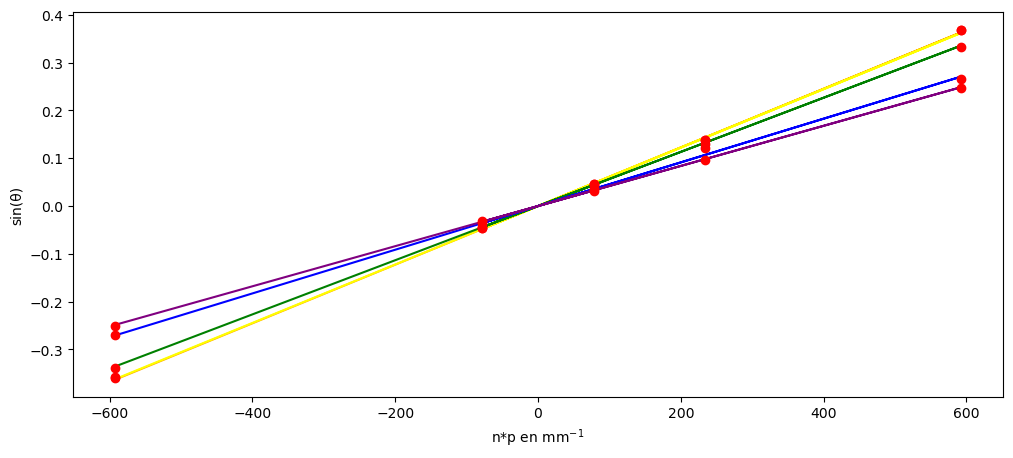

In [38]:
#figure 
fig,ax=plt.subplots(figsize=(12,5))
ax.set_xlabel("n*p en mm$^{-1}$") 
ax.set_ylabel("sin(θ)") 
ax.plot(x,f_fit(x,*poptj2),c='orange',label=f"régréssion linéaire raie jaune2\n sin(θ)=({λfitj2:.1f}\u00B1{Δλfitj2:.1f})*np")
ax.plot(x,f_fit(x,*poptj1),c='yellow',label=f"régréssion linéaire raie jaune1\n sin(θ)=({λfitj1:.1f}\u00B1{Δλfitj1:.1f})*np")
ax.plot(x,f_fit(x,*popt),c='g',label=f"régréssion linéaire raie verte\n sin(θ)=({λfitvert:.1f}\u00B1{Δλfitvert:.1f})*np")
ax.plot(x,f_fit(x,*popt2),c='b',label=f"régréssion linéaire raie indigo\n sin(θ)=({λfitindigo:.1f}\u00B1{Δλfitindigo:.1f})*np")
ax.plot(x,f_fit(x,*popt3),c='purple',label=f"régréssion linéaire raie violet\n sin(θ)=({λfitviolet:.1f}\u00B1{Δλfitviolet:.1f})*np")

ax.plot(x,yj2,'ro')
ax.plot(x,yj1,'ro')
ax.plot(x,yvert,'ro',label='points expérimentaux')
ax.plot(x,yindigo,'ro')
ax.plot(x,yviolet,'ro')
ax.errorbar(x, yj2, yerr=Δyj2, xerr= Δx, color='red',marker='',capsize=6,linestyle='')
ax.errorbar(x, yj1, yerr=Δyj1, xerr= Δx, color='red',marker='',capsize=6,linestyle='')
ax.errorbar(x, yvert, yerr=Δyvert, xerr= Δx, color='red',marker='',capsize=6,linestyle='',label="données exp (barres d'erreur)")
ax.errorbar(x, yindigo, yerr=Δyindigo, xerr= Δx, color='red',marker='',capsize=6,linestyle='')
ax.errorbar(x, yviolet, yerr=Δyviolet, xerr= Δx, color='red',marker='',capsize=6,linestyle='')
ax.set_title("régression linéaire pour chaque raie y=λx avec y=sinθ et x=np")
ax.legend()
ax.grid()
ax.savefig("data.png")


<font color="violet">**Conclure: C'est totalement cohérent.**</font>

## 3. Détermination de lambda par le minimum de déviation
- L'angle de déviation varie avec l'angle d'incidence sur le réseau. Pour chaque raie un angle de déviation minimum existe, associé à un angle d'incidence précis. 
- Pour une raie donnée, l'angle de déviation minimum est obtenu lorsqu'un point de rebroussement du faisceau dévié est observé en modifiant la position angulaire du réseau.
- -> En modifiant la position angulaire du réseau depuis l'incidence normale, sur chaque raie  ce point de rebroussement va être observé, c'est-à-dire que le déplacement de la raie va se faire  dans un premier temps vers la direction de l'ordre 0 pour ensuite s'en éloigner. L'angle au lieu de changement de comportement est le point de rebroussement qui permet de mesurer le minimum de déviation si on le mesure "à droite--> p>0" et "à gauche-->p<0" de la raie centrale (p=0).<br>
- soit $D_m=\theta_p -\theta_i$ la déviation. Pour s'affranchir de $\theta_i$, l'angle d'incidence sur le réseau on mesure le point de rebroussement à droite et à gauche.

Hors l'incidence normale la relation des réseaux devient $\sin(\theta_p)-sin(\theta_0)=n p \lambda \rightarrow 2 D_m=\theta_{droite,p>0}-\theta_{gauche,p<0} $
$\rightarrow \lambda_{raie}=\lambda_{REF}\frac{\sin(D_m)}{sin(D_{mREF})}$

<br>

**Dans cet exemple, le réseau est le $n_B=(80\pm 1)$ traits/mm, aux ordres $p=2,-2$ et la raie de référence est la verte de 546.1 nm**. 

**Appeler l'encadrant de TP pour confirmer votre bonne compréhension de cette méthode de mesure**.    

$\rightarrow$ ***Remplacer*** *par vos mesures les données renseignées dans la cellule suivante:*
 <br><font color="teal">(**suivre les instructions indiquées en vert et précédées d'un #.**)</font>

In [56]:
#donnés sur les raies choisies :
#on utilise la résaeux 600t/mm
# raies mesurées indigo et la première du doublet jaune ( modifier si nécessaire)
nom_raie2=np.array(['raie#1','raie#2'])
couleurHg2=np.array(['indigo','jaune1'])
lambdaHg2=np.array([435.83,576.96]) #en nm pour faire la comparaison avec la mesure

#données de la raie verte de REFERENCE à p=1 à droite et p=-1 à gauche : raie de référence à modifier!
theta_droite_ref=290+0/60
theta_gauche_ref=251+10/60
lambda_ref=546.1 # en nm

#prise de données expérimentales : modifier avec vos observations!
thetaD=np.array([286+4/60,291+0/60]) #mesures à droite (p>0) pour la raie#1 et la raie#2
thetaG=np.array([251+28/60,250+20/60]) #mesures à gauche (p<0) pour la raie#1 et la raie#2


In [57]:
#calcul et mise en forme des données:
Dm_ref=(theta_droite_ref-theta_gauche_ref)/2
Dm=(thetaD-thetaG)/2
lambda_raie=lambda_ref*(np.sin(np.pi/180*Dm))/(np.sin(np.pi/180*Dm_ref))
δλ=lambda_raie*(delta_theta*np.pi/180)*(1/np.tan(Dm_ref*np.pi/180)+1/np.tan(Dm*np.pi/180))

testD=np.array([test(lambda_raie[i],δλ[i],lambdaHg2[i]) for i in range(len(lambdaHg2))])

print( " pour les ordres p=\u00B1 2, avec la raie verte comme REF : λvert(nm)=",lambda_ref,"son angle de déviation minimum Dm=",np.round(Dm_ref,2),'°','\u00B1',delta_theta*60,"'")
pd.set_option("display.max_colwidth",12)
tabl2={'λ$_{connue}$(nm)':lambdaHg2,'raie':couleurHg2,'θ à droite(°)':np.round(thetaD,2),
       'θ à gauche(°)':np.round(thetaG,2),'Dm(°)':np.round(Dm,2),
       'λexp(nm)': np.round(lambda_raie,2),'Δλ(nm)':np.round(δλ,2),'comparaison':testD}
tabl2_data=pd.DataFrame(index=nom_raie2,data=tabl2)

tabl2_data


 pour les ordres p=± 2, avec la raie verte comme REF : λvert(nm)= 546.1 son angle de déviation minimum Dm= 19.42 ° ± 4.0 '


,λ$_{connue}$(nm),raie,θ à droite(°),θ à gauche(°),Dm(°),λexp(nm),Δλ(nm),comparaison
raie#1,435.83,indigo,286.07,251.47,17.30,488.51,3.44,out
raie#2,576.96,jaune1,291.00,250.33,20.33,570.82,3.68,out


# Conclusion
Comparer les méthodes qui conduisent à la détermination spectroscopique des longueus d'onde des raies caractéristiques du mercure.

<font color="violet"> **Réponse :** </font>

- Le fichier html créé, peut être converti en pdf par impression dans un fichier pdf depuis n'importe quel navigateur. 
- Il est possible de copier/coller les tableaux et les graphes depuis le Notebook ou le fichier html vers un fichier Word ou LibreOffice. Ce qui vous permet de ne pas "retaper" toutes vos données collectées et analysées durant la séance de TP.

- Ce Notebook peut aussi être téléchargé à partir du menu déroulant de ```Fichier```. Il vous suffit d'installer anaconda3 sur votre machine pour utiliser ce notebook et le transformer pour écrire votre compte-rendu.

In [58]:
# indiquer le nom de votre notebook à la place de "TP2_OPS.ipynb"
!jupyter nbconvert --to html  "TP2_OPS_Caulier_Charmate.ipynb" 
#!jupyter nbconvert --to html --no-input "TP2_OPS_Etudiants.ipynb" # document sans les cellules de code python

[NbConvertApp] Converting notebook TP2_OPS_Caulier_Charmate.ipynb to html
[NbConvertApp] Writing 943048 bytes to TP2_OPS_Caulier_Charmate.html


In [ ]:
#!print_notebook --rm 2 --no-input TP2_OPS.ipynb